In [1]:
import numpy as np
import random
from math import *

In [2]:
NUMBER_OF_NODE = 10;
NUMBER_OF_VOTE = "vote"
NUMBER_OF_VALIDATOR = "validator"
NUMBER_OF_DEPOSIT = "deposit"
NODE = "node"
SPEED = "speed"
RANKING = "ranking"
NUMBER_OF_EPOCH = "epoch"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NODE] = i+1
        nodes[i][SPEED] = 0
        nodes[i][RANKING] = 0
        nodes[i][NUMBER_OF_DEPOSIT] = 0
        nodes[i][NUMBER_OF_VOTE] = 0
        nodes[i][NUMBER_OF_VALIDATOR] = 0
        nodes[i][NUMBER_OF_EPOCH] = 0
        
    return nodes

In [3]:
#random speed of nodes
def random_nodes_speed(nodes):
    arr_speed = np.random.randint(low=5,high=10,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][SPEED] = arr_speed[i]
    return arr_speed

In [4]:
#random number of epochs that masternode join in blockchain
def random_epochs_of_nodes(nodes):
    arr_epochs = np.random.randint(low=1,high=9000,size=len(nodes)).tolist()
    for i in range(len(nodes)):
        nodes[i][NUMBER_OF_EPOCH] = arr_epochs[i]
    return arr_epochs

In [5]:
def deposit_votes(nodes):
    arr_deposit_vote = np.random.randint(low=50000,high=100000,size=len(nodes)).tolist()
    arr_deposit_vote = np.sort(arr_deposit_vote)[::-1]
    for i in range(len(arr_deposit_vote)):
        nodes[i][NUMBER_OF_DEPOSIT] = arr_deposit_vote[i]
    return arr_deposit_vote

In [6]:
# chose a leader node by voting
def vote_leader(nodes):
    
    #random array with length is number of canidate of leader
    arr_random = np.random.rand(len(nodes)).tolist()
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    arr_leader = []
    for i in range(len(nodes)):
        multi = nodes[i][NUMBER_OF_DEPOSIT] * arr_random[i]
        arr_leader.append(multi)
        if multi > maximum:
            index_of_leader = i
            maximum = arr_leader[i]
    nodes[index_of_leader][NUMBER_OF_VOTE] += 1
    return index_of_leader

In [7]:
# Ranking for each masternode
def ranking(nodes, arr_deposit_vote, arr_speed):
    total_deposit = sum(arr_deposit_vote)

    total_vote = 2000  # Total voting in one epoch
    total_epoch = 9000  # Total epoch in blockchain
    speed_arg = sum(arr_speed)/len(nodes)
    a = 0.6
    b,c,d,e = 0.25, 0.1, 0.3, 0.35
    for i in range(len(arr_deposit_vote)):
        trust = b*(nodes[i][NUMBER_OF_EPOCH]/total_epoch) + c*(
                nodes[i][SPEED]/speed_arg) + d*(
                nodes[i][NUMBER_OF_VOTE]/nodes[i][NUMBER_OF_EPOCH]) + e*(
                nodes[i][NUMBER_OF_VALIDATOR]/nodes[i][NUMBER_OF_EPOCH]) + (1-b-c-d-e)*(
                nodes[i][NUMBER_OF_VOTE]/total_vote)
        
        vote_arg_deposit = arr_deposit_vote[i]/total_deposit
        nodes[i][RANKING] = a*(vote_arg_deposit) + (1-a)*trust
        

In [8]:
# Random validator base on Ranking of each node
def random_validator(nodes, arr_deposit_vote, leader):
    index_of_validator = -1
    maximum = -1
    
    arr_random = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_random)):
        if nodes[i][RANKING] == 0:
            point = arr_random[i]
        else:
            point = nodes[i][RANKING] * arr_random[i]
            
        if point > maximum:
            maximum = point
            if i != leader:
                index_of_validator = i
                
    nodes[index_of_validator][NUMBER_OF_VALIDATOR] += 1
    return index_of_validator

In [9]:
nodes = init_nodes(150)
arr_deposit_vote = deposit_votes(nodes)
arr_speed = random_nodes_speed(nodes)
arr_epochs = random_epochs_of_nodes(nodes)
ranking(nodes, arr_deposit_vote, arr_speed)
# leader = vote_leader(nodes)
for i in range(1000):
    leader = vote_leader(nodes)
    validator = random_validator(nodes, arr_deposit_vote, leader)
    ranking(nodes, arr_deposit_vote, arr_speed)

In [10]:
x_array = []
leader_y_array = []
deposit_y_array = []
validator_y_array = []
epoch_y_array = []
ranking_y_array = []

for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][NUMBER_OF_VOTE])
    deposit_y_array.append(nodes[i][NUMBER_OF_DEPOSIT])
    validator_y_array.append(nodes[i][NUMBER_OF_VALIDATOR])
    epoch_y_array.append(nodes[i][NUMBER_OF_EPOCH])
    ranking_y_array.append(nodes[i][RANKING])

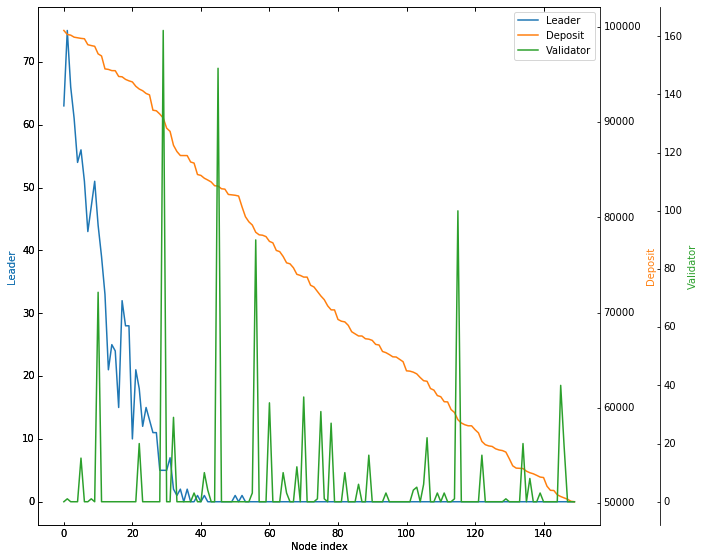

In [20]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Validator")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Leader")
par1.set_ylabel("Deposit")

p1, = host.plot(x_array, leader_y_array, label="Leader")
p2, = par1.plot(x_array, deposit_y_array, label="Deposit")
p3, = par2.plot(x_array, validator_y_array, label="Validator")

# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.show()

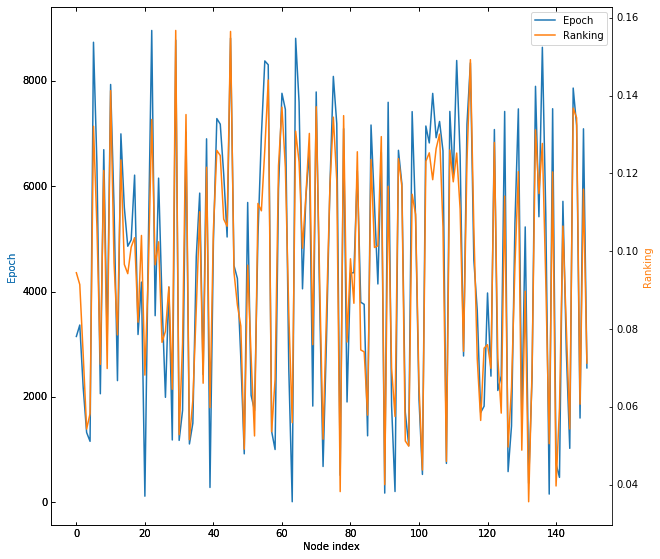

In [12]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.set_xlabel("Node index")
host.set_ylabel("Leader")

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Deposit")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Epoch")
par1.set_ylabel("Ranking")

p1, = host.plot(x_array, epoch_y_array, label="Epoch")
p2, = par1.plot(x_array, ranking_y_array, label="Ranking")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.show()

In [13]:
nodes

[{'deposit': 99606,
  'epoch': 3150,
  'node': 1,
  'ranking': 0.09450306672724079,
  'speed': 9,
  'validator': 0,
  'vote': 63},
 {'deposit': 99187,
  'epoch': 3367,
  'node': 2,
  'ranking': 0.09146429868531153,
  'speed': 8,
  'validator': 1,
  'vote': 75},
 {'deposit': 99115,
  'epoch': 2176,
  'node': 3,
  'ranking': 0.07341053779880208,
  'speed': 7,
  'validator': 0,
  'vote': 66},
 {'deposit': 98902,
  'epoch': 1328,
  'node': 4,
  'ranking': 0.054365796015362684,
  'speed': 5,
  'validator': 0,
  'vote': 61},
 {'deposit': 98838,
  'epoch': 1160,
  'node': 5,
  'ranking': 0.058311426911901276,
  'speed': 6,
  'validator': 0,
  'vote': 54},
 {'deposit': 98776,
  'epoch': 8732,
  'node': 6,
  'ranking': 0.13212362549203896,
  'speed': 5,
  'validator': 15,
  'vote': 56},
 {'deposit': 98736,
  'epoch': 6427,
  'node': 7,
  'ranking': 0.10645248931518206,
  'speed': 5,
  'validator': 0,
  'vote': 51},
 {'deposit': 98112,
  'epoch': 2063,
  'node': 8,
  'ranking': 0.070961825709606

In [14]:
node_none = []
for i in range(len(nodes)):
    if nodes[i][NUMBER_OF_VALIDATOR] == 0:
        node_none.append(nodes[i])

In [15]:
node_none

[{'deposit': 99606,
  'epoch': 3150,
  'node': 1,
  'ranking': 0.09450306672724079,
  'speed': 9,
  'validator': 0,
  'vote': 63},
 {'deposit': 99115,
  'epoch': 2176,
  'node': 3,
  'ranking': 0.07341053779880208,
  'speed': 7,
  'validator': 0,
  'vote': 66},
 {'deposit': 98902,
  'epoch': 1328,
  'node': 4,
  'ranking': 0.054365796015362684,
  'speed': 5,
  'validator': 0,
  'vote': 61},
 {'deposit': 98838,
  'epoch': 1160,
  'node': 5,
  'ranking': 0.058311426911901276,
  'speed': 6,
  'validator': 0,
  'vote': 54},
 {'deposit': 98736,
  'epoch': 6427,
  'node': 7,
  'ranking': 0.10645248931518206,
  'speed': 5,
  'validator': 0,
  'vote': 51},
 {'deposit': 98112,
  'epoch': 2063,
  'node': 8,
  'ranking': 0.07096182570960669,
  'speed': 7,
  'validator': 0,
  'vote': 43},
 {'deposit': 97945,
  'epoch': 3046,
  'node': 10,
  'ranking': 0.06989967356937327,
  'speed': 5,
  'validator': 0,
  'vote': 51},
 {'deposit': 96928,
  'epoch': 5602,
  'node': 12,
  'ranking': 0.09707047164433

In [21]:
len(node_none)

109

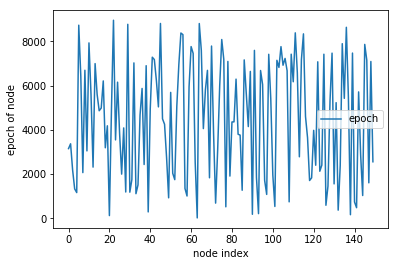

In [17]:
plt.xlabel("node index")
plt.ylabel("epoch of node")

plt.plot(x_array, epoch_y_array, label='epoch')
plt.legend()
plt.show()

In [18]:
max_node_none = -1
for i in range(len(node_none)):
    if node_none[i][RANKING] > max_node_none:
        max_node_none = node_none[i][RANKING]
max_node_none

0.12346849574745634

In [19]:
max_node = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] > max_node:
        max_node = nodes[i][RANKING]
max_node

0.1567232770110194